In [3]:
%load_ext autoreload
%autoreload 2

# import numpy as np
# import pandas as pd

# from trainer import Trainer
# import data
# import utils

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import MinMaxScaler


# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB, GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [4]:
#!python trainer.py

In [5]:
from predict import Predictor

In [6]:
predict_class = Predictor(test_data_path = "../raw_data/dreaddit-test.csv");

/Users/radulradulov/code/rradulov/dreaddit/dreaddit/predict.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.output_df['residual'] = abs(self.output_df['y_true'] -


In [7]:
accuracy = round((predict_class.y_pred == predict_class.y_true).sum() / len(predict_class.y_pred),3)

In [8]:
accuracy

0.762

In [9]:
residuals = predict_class.output_df.residual

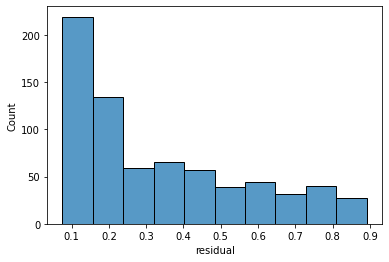

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(residuals, bins=10);

# Confusion Matrix:

The model was best at classifying stressed people correctly (81%), but only 71% accurate at classifying unstressed people.

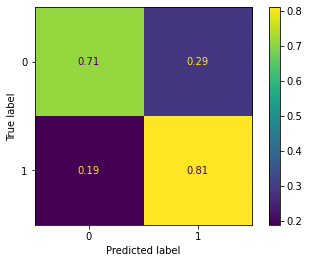

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(predict_class.y_true, predict_class.y_pred, labels=[0,1],normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
disp.figure_.savefig('/Users/radulradulov/code/rradulov/dreaddit/images/conf_matrix.png', 
                     bbox_inches='tight') #,dpi=300)

# Analysis of the biggest residuals:

## Where: Residual = ABS(Predict_Proba - Y_true)

In [12]:
predict_class.cleaned_output_df.sort_values(by=['confidence','residual'],ascending=False).head(3)

,text,predict_proba,y_pred,y_true,confidence,residual
322,Then I came home. My Mom pointed it out f...,0.120120,0,1,1.0,0.879880
476,I always have to touch my face and trace my fi...,0.821563,1,0,1.0,0.821563
597,Wrote this in about three minutes today. I nee...,0.783672,1,0,1.0,0.783672


In [24]:
predict_class.cleaned_output_df.sort_values(by=['confidence','residual'],ascending=False).head(3)[['text','residual']]


,text,residual
322,Then I came home. My Mom pointed it out f...,0.879880
476,I always have to touch my face and trace my fi...,0.821563
597,Wrote this in about three minutes today. I nee...,0.783672


In [13]:
predict_class.cleaned_output_df.loc[322].text

'Then I came home.      My Mom pointed it out first, I went from being the class clown and the life of the party, to being the quiet guy who stood in the corner of the room. I went from a musician and avid gamer, to having no interest in any of it, and no replacement hobby. The things I had the most passion for in life were gone. It was like someone removed one of my five senses and my soul at the same time.'

In [14]:
predict_class.cleaned_output_df.loc[597].text

"Wrote this in about three minutes today. I need to work some things out but it is crazy how much writing has helped me in the past three and a half months. My therapist credits my journaling to the progress I am continuing to make. I want to send my thoughts to everyone posting on this sub, I am strong not only for myself but for you. Being in a toxic relationship is so isolating you don't even realize how many people feel hopeless and desperate for change."

# Analysis of the best predictions:

In [15]:
predict_class.cleaned_output_df.sort_values(by=['residual'],ascending=True).head(3)

,text,predict_proba,y_pred,y_true,confidence,residual
68,"###Hello everyone!, We hope you've begun defro...",0.075269,0,0,1.0,0.075269
279,"If you are interested in participating, you wi...",0.076746,0,0,1.0,0.076746
278,"Or, if you would like further information, ple...",0.078158,0,0,0.8,0.078158


In [26]:
predict_class.cleaned_output_df.sort_values(by=['residual'],ascending=True).head(3)[['text','residual']]

,text,residual
68,"###Hello everyone!, We hope you've begun defro...",0.075269
279,"If you are interested in participating, you wi...",0.076746
278,"Or, if you would like further information, ple...",0.078158


In [16]:
predict_class.cleaned_output_df.loc[68].text

"###Hello everyone!, We hope you've begun defrosting your turkeys in preparation for a delicious meal. As the holiday season begins to ramp up, we've decided to try a new approach to handling the influx of Thanksgiving-related posts we normally receive every year. We're excited to be launching a Thanksgiving MegaThread, a single post for users to share their turkey-day anxieties and support others. Our goal in this trial is two-fold:"

In [17]:
predict_class.cleaned_output_df.loc[279].text

'If you are interested in participating, you will be asked to complete an anonymous online survey that will take approximately 20 to 30 minutes, one time only. If you are interested in participating, please click on the following link: <url> Or, if you would like further information, please message me. For your participation, you may choose to enter a raffle to win one of eight $25.00 <url> gift cards.'